In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [2]:
df1 = pd.read_csv('문화예술행사_만족도_및_시설_만족도_20240417194942_영주시 2021_KOSIS.csv', encoding='cp949')
df2 = pd.read_csv('202303_202403_주민등록인구기타현황(고령 인구현황)_OldAgeDetail_행정안전부.csv', encoding='cp949')
df3 = pd.read_csv('202303_202403_주민등록인구기타현황(인구증감)_월간_영주시_행정안전부.csv', encoding = 'cp949')
df4 = pd.read_csv('202310_202403_연령별인구현황_월간_영주시_KOSIS.csv', encoding='cp949')
df4_1 = pd.read_csv('202309_202309_연령별인구현황_월간.csv', encoding='cp949')
df4_2 = pd.read_csv('202303_202308_연령별인구현황_월간.csv', encoding='cp949')
df5 = pd.read_csv('삶에_대한_만족감과_정서경험_20240417195052_영주시_KOSIS.csv', encoding='cp949')
df6 = pd.read_csv('여가생활_만족도_및_불만족_이유_20240417195204_영주시 2022_KOSIS.csv', encoding = 'cp949')
df7 = pd.read_csv('인구증가정책_20240417195133_영주시_KOSIS.csv', encoding='cp949')

In [3]:
df2 = df2.replace(',', '', regex=True)
df2.set_index(df2.columns[0], inplace=True)
df2 = df2.astype(int)
df2 = df2.filter(like='_65세이상전체')

In [4]:
df2

,2023년03월_65세이상전체,2023년04월_65세이상전체,2023년05월_65세이상전체,2023년06월_65세이상전체,2023년07월_65세이상전체,2023년08월_65세이상전체,2023년09월_65세이상전체,2023년10월_65세이상전체,2023년11월_65세이상전체,2023년12월_65세이상전체,2024년01월_65세이상전체,2024년02월_65세이상전체,2024년03월_65세이상전체
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),29994,30059,30113,30128,30158,30239,30290,30355,30376,30454,30556,30660,30785
경상북도 영주시 풍기읍(4721025000),3705,3726,3730,3724,3728,3740,3745,3749,3751,3762,3775,3793,3807
경상북도 영주시 이산면(4721031000),959,959,954,957,959,958,960,958,954,949,955,958,962
경상북도 영주시 평은면(4721032000),727,728,726,729,731,730,730,732,734,740,745,755,753
경상북도 영주시 문수면(4721033000),849,849,861,861,864,869,871,874,871,877,875,886,890
경상북도 영주시 장수면(4721034000),981,979,980,981,973,974,977,980,987,989,987,983,994
경상북도 영주시 안정면(4721035000),1371,1373,1374,1382,1387,1383,1388,1388,1390,1391,1392,1398,1398
경상북도 영주시 봉현면(4721036000),1167,1168,1173,1168,1169,1168,1166,1165,1163,1163,1168,1173,1176
경상북도 영주시 순흥면(4721037000),936,934,936,933,933,932,937,938,936,942,944,950,955


In [5]:
total_age = df2.iloc[[0]]
total_age

,2023년03월_65세이상전체,2023년04월_65세이상전체,2023년05월_65세이상전체,2023년06월_65세이상전체,2023년07월_65세이상전체,2023년08월_65세이상전체,2023년09월_65세이상전체,2023년10월_65세이상전체,2023년11월_65세이상전체,2023년12월_65세이상전체,2024년01월_65세이상전체,2024년02월_65세이상전체,2024년03월_65세이상전체
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),29994,30059,30113,30128,30158,30239,30290,30355,30376,30454,30556,30660,30785


In [6]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

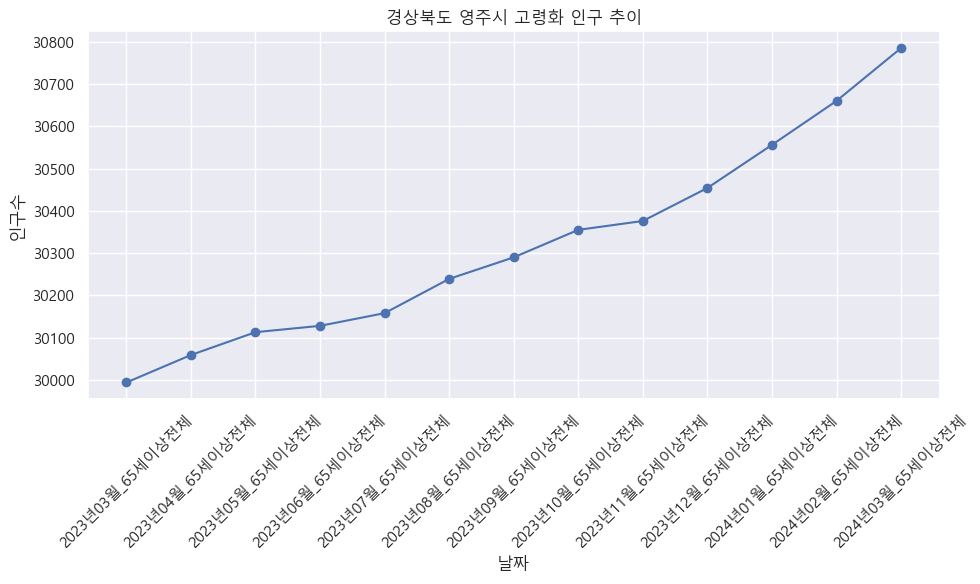

In [7]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(total_age.columns, total_age.loc['경상북도 경상북도 영주시 (4721000000)'], marker='o')
plt.xlabel('날짜')  # x축 라벨 설정
plt.ylabel('인구수')  # y축 라벨 설정
plt.title('경상북도 영주시 고령화 인구 추이')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 그리드 표시
plt.tight_layout()  # 레이아웃 조정
plt.savefig('고령화 인구수')
plt.show()  # 그래프 출력

In [8]:
df3 = df3.replace(',', '', regex=True)
df3.set_index(df3.columns[0], inplace=True)
df3 = df3.astype(int)
df3_total = df3.filter(like='_인구증감_계')
df3_last = df3.filter(like='_전월인구_계')
df3_now = df3.filter(like='_당월인구수_계')

In [9]:
df3_now

,2023년03월_당월인구수_계,2023년04월_당월인구수_계,2023년05월_당월인구수_계,2023년06월_당월인구수_계,2023년07월_당월인구수_계,2023년08월_당월인구수_계,2023년09월_당월인구수_계,2023년10월_당월인구수_계,2023년11월_당월인구수_계,2023년12월_당월인구수_계,2024년01월_당월인구수_계,2024년02월_당월인구수_계,2024년03월_당월인구수_계
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),100847,100746,100610,100491,100363,100196,100011,100208,100216,100199,100100,99966,100072
경상북도 영주시 풍기읍(4721025000),10482,10497,10483,10482,10462,10449,10427,10551,10536,10515,10558,10553,10580
경상북도 영주시 이산면(4721031000),2240,2239,2229,2231,2231,2227,2210,2200,2193,2193,2194,2199,2195
경상북도 영주시 평은면(4721032000),1426,1427,1421,1417,1414,1410,1394,1391,1392,1405,1410,1413,1401
경상북도 영주시 문수면(4721033000),1934,1932,1943,1947,1942,1940,1925,1925,1920,1919,1917,1914,1909
경상북도 영주시 장수면(4721034000),2103,2092,2093,2095,2085,2076,2074,2071,2075,2078,2068,2058,2056
경상북도 영주시 안정면(4721035000),2862,2851,2843,2844,2853,2844,2843,2851,2855,2846,2841,2843,2837
경상북도 영주시 봉현면(4721036000),2605,2606,2614,2600,2590,2581,2574,2574,2561,2566,2555,2552,2551
경상북도 영주시 순흥면(4721037000),1935,1926,1928,1922,1914,1912,1902,1899,1893,1878,1886,1883,1899


In [10]:
total_people = df3_now.iloc[[0]]
total_people

,2023년03월_당월인구수_계,2023년04월_당월인구수_계,2023년05월_당월인구수_계,2023년06월_당월인구수_계,2023년07월_당월인구수_계,2023년08월_당월인구수_계,2023년09월_당월인구수_계,2023년10월_당월인구수_계,2023년11월_당월인구수_계,2023년12월_당월인구수_계,2024년01월_당월인구수_계,2024년02월_당월인구수_계,2024년03월_당월인구수_계
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),100847,100746,100610,100491,100363,100196,100011,100208,100216,100199,100100,99966,100072


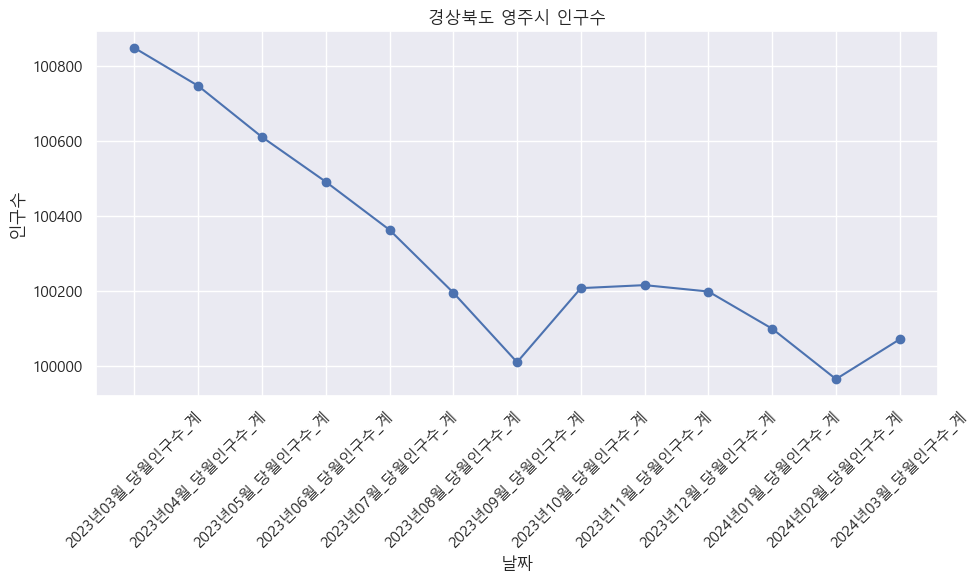

In [11]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(total_people.columns, total_people.loc['경상북도 경상북도 영주시 (4721000000)'], marker='o')
plt.xlabel('날짜')  # x축 라벨 설정
plt.ylabel('인구수')  # y축 라벨 설정
plt.title('경상북도 영주시 인구수')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 그리드 표시
plt.tight_layout()  # 레이아웃 조정
plt.savefig('영주시 인구수')
plt.show()  # 그래프 출력

In [12]:
df4_2

,행정구역,2023년03월_계_총인구수,2023년03월_계_연령구간인구수,2023년03월_계_0~9세,2023년03월_계_10~19세,2023년03월_계_20~29세,2023년03월_계_30~39세,2023년03월_계_40~49세,2023년03월_계_50~59세,2023년03월_계_60~69세,...,2023년08월_여_10~19세,2023년08월_여_20~29세,2023년08월_여_30~39세,2023년08월_여_40~49세,2023년08월_여_50~59세,2023년08월_여_60~69세,2023년08월_여_70~79세,2023년08월_여_80~89세,2023년08월_여_90~99세,2023년08월_여_100세 이상
0,경상북도 경상북도 영주시 (4721000000),"100,847","100,847","5,205","8,762","9,067","7,728","12,836","17,025","19,230",...,"4,120","3,813","3,442","6,150","8,165","9,863","6,689","4,934",917,30
1,경상북도 영주시 풍기읍(4721025000),"10,482","10,482",370,779,976,627,"1,059","1,700","2,392",...,361,348,294,489,791,"1,222",819,600,114,6
2,경상북도 영주시 이산면(4721031000),"2,240","2,240",40,81,131,107,157,418,612,...,47,50,51,66,177,272,176,191,41,0
3,경상북도 영주시 평은면(4721032000),"1,426","1,426",19,52,52,44,91,256,374,...,28,17,18,28,112,167,147,135,32,0
4,경상북도 영주시 문수면(4721033000),"1,934","1,934",57,77,105,111,140,312,500,...,37,47,35,56,137,224,158,166,52,3
5,경상북도 영주시 장수면(4721034000),"2,103","2,103",57,87,130,105,154,323,526,...,41,51,45,56,139,239,183,179,55,5
6,경상북도 영주시 안정면(4721035000),"2,862","2,862",62,119,134,128,220,457,738,...,47,51,51,81,198,356,272,278,57,2
7,경상북도 영주시 봉현면(4721036000),"2,605","2,605",57,112,127,108,223,429,753,...,52,44,48,88,203,357,246,168,39,2
8,경상북도 영주시 순흥면(4721037000),"1,935","1,935",24,60,105,66,121,321,578,...,23,30,30,45,153,277,182,159,26,0
9,경상북도 영주시 단산면(4721038000),"1,804","1,804",18,57,84,66,123,308,479,...,19,22,31,39,148,217,186,195,35,1


In [13]:
def replace(df):
    df = df.replace(',', '', regex=True)
    df.set_index(df.columns[0], inplace=True)
    df = df.astype(int)
    
    columns_to_filter = ['계_0~9세', '계_10~19세', '계_20~29세']

    # 필터링된 열들만을 포함하는 데이터프레임 생성
    df_filtered = df.loc[:, df.columns[df.columns.str.contains('|'.join(columns_to_filter))]]
    
        # 열 이름에서 년도와 월 추출
    year_month = df_filtered.columns.str.extract(r'(\d{4}년\d{2}월)', expand=False)
    # 년도와 월을 기준으로 그룹화하여 합계 계산
    grouped_df = df_filtered.groupby(year_month, axis=1).sum()

    return grouped_df

In [14]:
df_3_8 = replace(df4_2)
df_9 = replace(df4_1)
df_10 = replace(df4)

In [15]:
df_young = pd.concat([df_3_8, df_9, df_10], axis=1)

In [16]:
df_young = df_young.iloc[[0]]

In [17]:
df_young

,2023년03월,2023년04월,2023년05월,2023년06월,2023년07월,2023년08월,2023년09월,2023년10월,2023년11월,2023년12월,2024년01월,2024년02월,2024년03월
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),23034,22961,22885,22831,22740,22598,22487,22649,22641,22626,22555,22422,22534


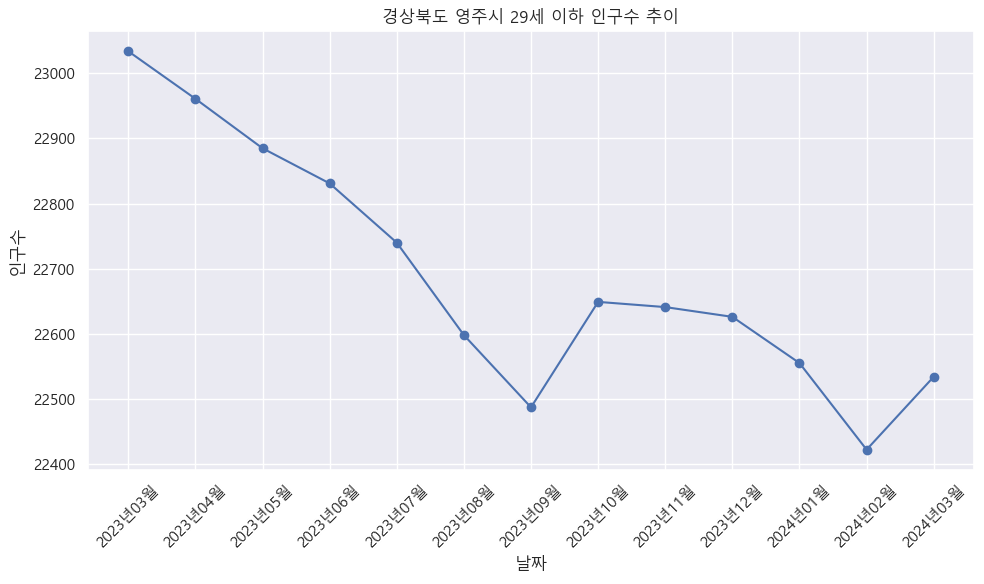

In [18]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(df_young.columns, df_young.loc['경상북도 경상북도 영주시 (4721000000)'], marker='o')
plt.xlabel('날짜')  # x축 라벨 설정
plt.ylabel('인구수')  # y축 라벨 설정
plt.title('경상북도 영주시 29세 이하 인구수 추이')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 그리드 표시
plt.tight_layout()  # 레이아웃 조정
plt.savefig('29세 이하 인구수 추이')
plt.show()  # 그래프 출력

In [19]:
# 첫 번째 행을 열 이름으로 설정하고 기존의 열 이름은 삭제
df5.columns = df5.iloc[0]
df5 = df5.drop(0)

# 데이터프레임의 인덱스를 재설정 (기존 인덱스는 삭제)
df5 = df5.reset_index(drop=True)

In [20]:
df5

,특성별(1),특성별(2),삶에 대한 전반적 만족도,지역(시군구)에 대한 전반적 만족도,어제 하루의 행복,어제 하루의 걱정
0,전체,소계,5.91,5.67,5.67,5.21
1,성별,남자,5.96,5.66,5.61,5.21
2,성별,여자,5.85,5.67,5.72,5.21
3,연령별,29세이하,5.84,5.23,5.64,5.31
4,연령별,30 ~ 39세,6.49,6.08,6.23,5.64
5,연령별,40 ~ 49세,6.30,5.99,6.12,5.74
6,연령별,50 ~ 59세,5.84,5.67,5.73,5.19
7,연령별,60 ~ 69세,5.78,5.66,5.48,5.04
8,연령별,70세이상,5.64,5.59,5.29,4.82
9,경제활동 상태별,취업자,6.14,5.86,5.84,5.23


In [21]:
df5['지역(시군구)에 대한 전반적 만족도'] = df5['지역(시군구)에 대한 전반적 만족도'].astype(float)
city_satisfied = df5.loc[df5['특성별(1)']=='연령별']

In [22]:
city_satisfied = city_satisfied.drop(columns=['특성별(1)', '어제 하루의 행복', '어제 하루의 걱정', '삶에 대한 전반적 만족도'])

In [23]:
city_satisfied = city_satisfied.rename(columns={'특성별(2)':'연령별'})

In [24]:
city_satisfied

,연령별,지역(시군구)에 대한 전반적 만족도
3,29세이하,5.23
4,30 ~ 39세,6.08
5,40 ~ 49세,5.99
6,50 ~ 59세,5.67
7,60 ~ 69세,5.66
8,70세이상,5.59


In [25]:
# 첫 번째 행을 열 이름으로 설정하고 기존의 열 이름은 삭제
df7.columns = df7.iloc[0]
df7 = df7.drop(0)

# 데이터프레임의 인덱스를 재설정 (기존 인덱스는 삭제)
df7 = df7.reset_index(drop=True)

In [26]:
df7

,특성별(1),특성별(2),출산 및 육아정책,일자리 창출 및 정착 지원,체육시설 및 문화공간 확충,편리한 교통체계,우수한 교육기관 증설,주거단지 조성·지원,귀농귀촌자 지원 확대,치안·범죄로부터의 안전,기타
0,전체,소계,47.5,71.6,14.7,10.5,21.0,14.2,19.1,1.3,0.0
1,성별,남자,46.0,68.8,15.5,12.6,21.2,15.9,18.8,1.3,0.0
2,성별,여자,49.0,74.4,14.0,8.3,20.9,12.5,19.5,1.4,0.0
3,연령별,29세이하,42.8,67.2,18.0,13.8,22.5,13.8,21.8,0.0,0.0
4,연령별,30 ~ 39세,54.9,72.7,16.0,9.3,27.1,8.0,12.0,0.0,0.0
5,연령별,40 ~ 49세,52.0,75.0,15.9,7.1,23.9,12.4,12.8,0.9,0.0
6,연령별,50 ~ 59세,45.5,74.4,14.3,7.7,22.0,14.7,18.4,3.1,0.0
7,연령별,60 ~ 69세,47.6,70.0,15.4,12.6,17.3,16.4,20.3,0.5,0.0
8,연령별,70세이상,46.5,71.2,11.0,11.2,18.6,15.5,23.7,2.2,0.0
9,경제활동 상태별,취업자,49.6,69.3,14.3,10.1,20.9,14.9,19.7,1.2,0.0


In [27]:
policy = df7.loc[df7['특성별(1)'] == '연령별']
policy = policy.drop(columns=['특성별(1)', '기타'])

In [28]:
policy = policy.rename(columns={'특성별(2)':'연령별'})

In [29]:
policy

,연령별,출산 및 육아정책,일자리 창출 및 정착 지원,체육시설 및 문화공간 확충,편리한 교통체계,우수한 교육기관 증설,주거단지 조성·지원,귀농귀촌자 지원 확대,치안·범죄로부터의 안전
3,29세이하,42.8,67.2,18.0,13.8,22.5,13.8,21.8,0.0
4,30 ~ 39세,54.9,72.7,16.0,9.3,27.1,8.0,12.0,0.0
5,40 ~ 49세,52.0,75.0,15.9,7.1,23.9,12.4,12.8,0.9
6,50 ~ 59세,45.5,74.4,14.3,7.7,22.0,14.7,18.4,3.1
7,60 ~ 69세,47.6,70.0,15.4,12.6,17.3,16.4,20.3,0.5
8,70세이상,46.5,71.2,11.0,11.2,18.6,15.5,23.7,2.2


In [30]:
total_people

,2023년03월_당월인구수_계,2023년04월_당월인구수_계,2023년05월_당월인구수_계,2023년06월_당월인구수_계,2023년07월_당월인구수_계,2023년08월_당월인구수_계,2023년09월_당월인구수_계,2023년10월_당월인구수_계,2023년11월_당월인구수_계,2023년12월_당월인구수_계,2024년01월_당월인구수_계,2024년02월_당월인구수_계,2024년03월_당월인구수_계
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),100847,100746,100610,100491,100363,100196,100011,100208,100216,100199,100100,99966,100072


In [31]:
df_young

,2023년03월,2023년04월,2023년05월,2023년06월,2023년07월,2023년08월,2023년09월,2023년10월,2023년11월,2023년12월,2024년01월,2024년02월,2024년03월
행정구역,,,,,,,,,,,,,
경상북도 경상북도 영주시 (4721000000),23034,22961,22885,22831,22740,22598,22487,22649,22641,22626,22555,22422,22534


In [32]:
temp1 = pd.merge(city_satisfied, policy, on='연령별')
temp1 = temp1.set_index(temp1.columns[0])
temp1

,지역(시군구)에 대한 전반적 만족도,출산 및 육아정책,일자리 창출 및 정착 지원,체육시설 및 문화공간 확충,편리한 교통체계,우수한 교육기관 증설,주거단지 조성·지원,귀농귀촌자 지원 확대,치안·범죄로부터의 안전
연령별,,,,,,,,,
29세이하,5.23,42.8,67.2,18.0,13.8,22.5,13.8,21.8,0.0
30 ~ 39세,6.08,54.9,72.7,16.0,9.3,27.1,8.0,12.0,0.0
40 ~ 49세,5.99,52.0,75.0,15.9,7.1,23.9,12.4,12.8,0.9
50 ~ 59세,5.67,45.5,74.4,14.3,7.7,22.0,14.7,18.4,3.1
60 ~ 69세,5.66,47.6,70.0,15.4,12.6,17.3,16.4,20.3,0.5
70세이상,5.59,46.5,71.2,11.0,11.2,18.6,15.5,23.7,2.2


In [33]:
temp1 = temp1.astype(float)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 29세이하 to 70세이상
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지역(시군구)에 대한 전반적 만족도  6 non-null      float64
 1   출산 및 육아정책            6 non-null      float64
 2   일자리 창출 및 정착 지원       6 non-null      float64
 3   체육시설 및 문화공간 확충       6 non-null      float64
 4   편리한 교통체계             6 non-null      float64
 5   우수한 교육기관 증설          6 non-null      float64
 6   주거단지 조성·지원           6 non-null      float64
 7   귀농귀촌자 지원 확대          6 non-null      float64
 8   치안·범죄로부터의 안전         6 non-null      float64
dtypes: float64(9)
memory usage: 480.0+ bytes


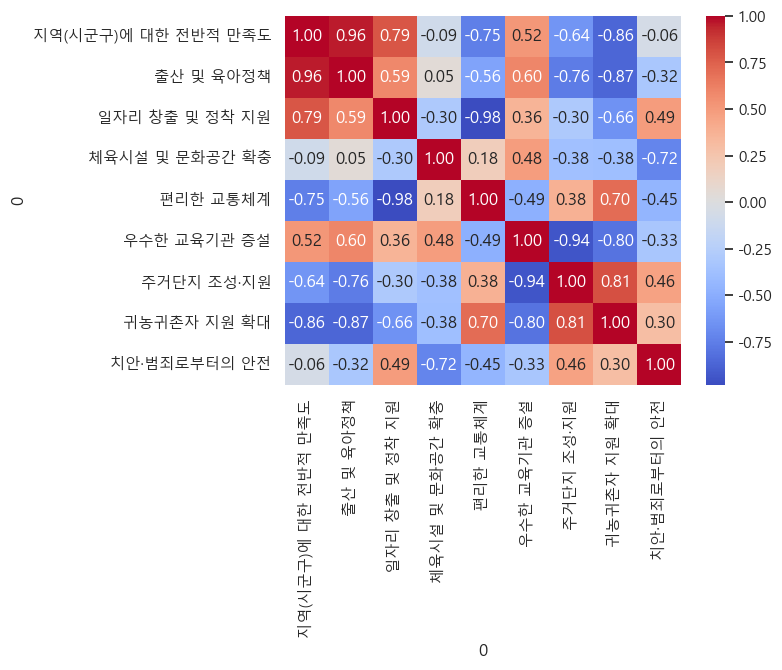

In [34]:
sns.heatmap(temp1.corr(), annot=True, cmap = 'coolwarm', fmt='.2f')
plt.show()

In [35]:
target = '지역(시군구)에 대한 전반적 만족도'

x = temp1.drop(target, axis=1)
y = temp1.loc[:, target]

In [36]:
y

연령별
29세이하       5.23
30 ~ 39세    6.08
40 ~ 49세    5.99
50 ~ 59세    5.67
60 ~ 69세    5.66
70세이상       5.59
Name: 지역(시군구)에 대한 전반적 만족도, dtype: float64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1,  shuffle = True)


In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)

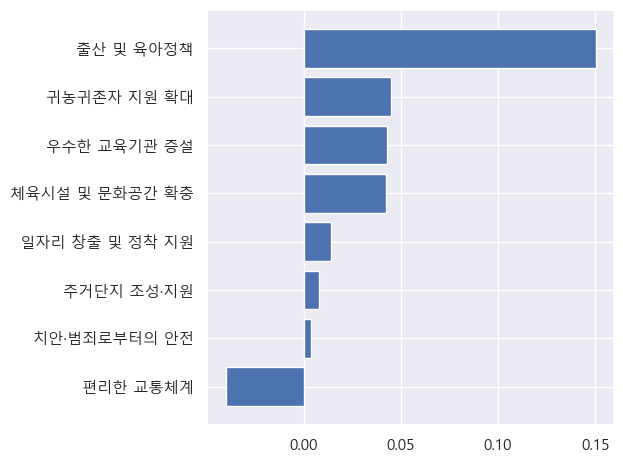

In [40]:
codf = pd.DataFrame()
codf['feature'] = list(x)
codf['coef'] = model.coef_

codf.sort_values(by='coef', ascending = True, inplace = True)

plt.barh(y=codf['feature'], width=codf['coef'])
plt.savefig('인구정책 중요도-20대 이하.png',  dpi=100, bbox_inches='tight')
plt.tight_layout()
plt.show()

### df2,3,4,5 외 나머지

In [41]:
# 첫 번째 행을 열 이름으로 설정하고 기존의 열 이름은 삭제
df1.columns = df1.iloc[0]
df1 = df1.drop(0)

In [42]:
# 첫 번째 행을 복사하여 새로운 행 생성
new_index = df1.iloc[0].copy()

In [43]:
len(new_index)

14

In [44]:
# 첫 번째 행과 인덱스 행을 합치기
new_index += '_' + df1.columns.astype(str)

In [45]:
df1.columns = new_index

In [46]:
df1.drop(1)

1,특성별(1)_특성별(1),특성별(2)_특성별(2),매우 불만족 (%)_문화예술행사,약간 불만족 (%)_문화예술행사,보통 (%)_문화예술행사,약간 만족 (%)_문화예술행사,매우 만족 (%)_문화예술행사,평균 (점)_문화예술행사,매우 불만족 (%)_문화예술행사 시설,약간 불만족 (%)_문화예술행사 시설,보통 (%)_문화예술행사 시설,약간 만족 (%)_문화예술행사 시설,매우 만족 (%)_문화예술행사 시설,평균 (점)_문화예술행사 시설
2,전체,소계,0.6,4.7,47.5,45.4,1.9,3.43,0.6,6.4,47.7,44.4,0.9,3.38
3,성별,남자,0.0,3.4,53.2,41.2,2.2,3.42,0.0,6.5,53.7,38.2,1.6,3.35
4,성별,여자,1.2,6.0,41.5,49.8,1.5,3.44,1.2,6.3,41.4,51.1,0.0,3.42
5,연령별,29세 이하,1.3,3.2,66.6,28.0,0.9,3.24,1.3,6.9,60.3,31.6,0.0,3.22
6,연령별,30 ~ 39세,0.0,6.0,22.7,67.5,3.7,3.69,0.0,9.0,26.2,61.1,3.7,3.59
7,연령별,40 ~ 49세,0.0,6.9,35.8,55.6,1.7,3.52,0.0,4.4,49.5,46.1,0.0,3.42
8,연령별,50 ~ 59세,0.0,4.9,30.9,59.8,4.3,3.64,0.0,4.9,37.7,55.3,2.2,3.55
9,연령별,60 ~ 69세,0.0,4.2,30.9,64.9,0.0,3.61,0.0,4.2,26.2,69.6,0.0,3.65
10,연령별,70세 이상,0.0,15.6,42.2,42.2,0.0,3.27,0.0,15.6,23.9,60.5,0.0,3.45
11,경제활동별,취업자,0.0,5.0,39.0,53.3,2.7,3.54,0.0,3.4,39.4,55.6,1.6,3.55


In [47]:
df1 = df1.loc[df1['특성별(1)_특성별(1)'] == '연령별']
df1 = df1.drop(columns='특성별(1)_특성별(1)')

In [48]:
df1

1,특성별(2)_특성별(2),매우 불만족 (%)_문화예술행사,약간 불만족 (%)_문화예술행사,보통 (%)_문화예술행사,약간 만족 (%)_문화예술행사,매우 만족 (%)_문화예술행사,평균 (점)_문화예술행사,매우 불만족 (%)_문화예술행사 시설,약간 불만족 (%)_문화예술행사 시설,보통 (%)_문화예술행사 시설,약간 만족 (%)_문화예술행사 시설,매우 만족 (%)_문화예술행사 시설,평균 (점)_문화예술행사 시설
5,29세 이하,1.3,3.2,66.6,28.0,0.9,3.24,1.3,6.9,60.3,31.6,0.0,3.22
6,30 ~ 39세,0.0,6.0,22.7,67.5,3.7,3.69,0.0,9.0,26.2,61.1,3.7,3.59
7,40 ~ 49세,0.0,6.9,35.8,55.6,1.7,3.52,0.0,4.4,49.5,46.1,0.0,3.42
8,50 ~ 59세,0.0,4.9,30.9,59.8,4.3,3.64,0.0,4.9,37.7,55.3,2.2,3.55
9,60 ~ 69세,0.0,4.2,30.9,64.9,0.0,3.61,0.0,4.2,26.2,69.6,0.0,3.65
10,70세 이상,0.0,15.6,42.2,42.2,0.0,3.27,0.0,15.6,23.9,60.5,0.0,3.45


In [49]:
festival = df1.iloc[:, :7]
festival = festival.rename(columns={'특성별(2)_특성별(2)': '연령대'})


In [50]:
festival_facility = df1[['특성별(2)_특성별(2)']]
festival_add = df1.filter(like='시설')
festival_facility = pd.concat([festival_facility, festival_add], axis=1)
festival_facility = festival_facility.rename(columns={'특성별(2)_특성별(2)': '연령대'})

In [51]:
festival_facility

1,연령대,매우 불만족 (%)_문화예술행사 시설,약간 불만족 (%)_문화예술행사 시설,보통 (%)_문화예술행사 시설,약간 만족 (%)_문화예술행사 시설,매우 만족 (%)_문화예술행사 시설,평균 (점)_문화예술행사 시설
5,29세 이하,1.3,6.9,60.3,31.6,0.0,3.22
6,30 ~ 39세,0.0,9.0,26.2,61.1,3.7,3.59
7,40 ~ 49세,0.0,4.4,49.5,46.1,0.0,3.42
8,50 ~ 59세,0.0,4.9,37.7,55.3,2.2,3.55
9,60 ~ 69세,0.0,4.2,26.2,69.6,0.0,3.65
10,70세 이상,0.0,15.6,23.9,60.5,0.0,3.45


In [53]:
# 첫 번째 행을 열 이름으로 설정하고 기존의 열 이름은 삭제
df6.columns = df6.iloc[0]
df6 = df6.drop(0)

# 데이터프레임의 인덱스를 재설정 (기존 인덱스는 삭제)
df6 = df6.reset_index(drop=True)

In [54]:

# # 첫 번째 행을 복사하여 새로운 행 생성
new_index = df6.iloc[0].copy()

# 첫 번째 행과 인덱스 행을 합치기
new_index += '_' + df6.columns.astype(str)
df6.columns = new_index
df6 = df6.drop(0)


In [55]:
df6

,특성별(1)_특성별(1),특성별(2)_특성별(2),매우 불만족 (%)_문화여가시설(접근성과 충분정도),약간 불만족 (%)_문화여가시설(접근성과 충분정도),보통 (%)_문화여가시설(접근성과 충분정도),약간 만족 (%)_문화여가시설(접근성과 충분정도),매우 만족 (%)_문화여가시설(접근성과 충분정도),평균(5점) (점)_문화여가시설(접근성과 충분정도),매우 불만족 (%)_전반적인 여가활동,약간 불만족 (%)_전반적인 여가활동,...,평균(5점) (점)_전반적인 여가활동,경제적 부담 때문에_불만족 이유 (%),시간이 부족하여_불만족 이유 (%),교통혼잡 및 이용 교통수단이 불편해서_불만족 이유 (%),여가시설이 부족하여_불만족 이유 (%),여가 정보 및 프로그램이 부족하여_불만족 이유 (%),적당한 취미가 없어서_불만족 이유 (%),체력이나 건강이 좋지 않아서_불만족 이유 (%),여가를 함께 즐길 사람이 없어서_불만족 이유 (%),기타_불만족 이유 (%)
1,전체,소계,4.8,30.6,53.9,10.7,0.0,2.71,5.0,28.8,...,2.72,13.8,18.3,3.7,26.8,13.5,9.0,13.3,1.3,0.2
2,성별,남자,6.1,32.5,51.7,9.7,0.0,2.65,6.2,30.9,...,2.67,13.4,23.1,3.2,25.2,12.4,9.1,11.6,1.6,0.4
3,성별,여자,3.5,28.7,56.0,11.8,0.0,2.76,3.9,26.9,...,2.77,14.2,12.9,4.3,28.7,14.8,8.9,15.3,0.9,0.0
4,연령별,29세이하,6.2,41.1,45.7,7.0,0.0,2.53,7.4,33.9,...,2.56,11.0,13.9,7.2,44.1,13.1,3.3,7.4,0.0,0.0
5,연령별,30 ~ 39세,7.7,30.3,45.9,16.1,0.0,2.70,7.7,25.8,...,2.74,3.9,26.3,0.0,54.0,15.8,0.0,0.0,0.0,0.0
6,연령별,40 ~ 49세,7.8,27.5,49.5,15.3,0.0,2.72,7.8,24.6,...,2.74,11.2,23.8,1.7,43.8,16.6,1.7,0.0,1.3,0.0
7,연령별,50 ~ 59세,4.9,29.4,57.0,8.7,0.0,2.69,4.6,29.9,...,2.69,14.7,23.3,5.1,21.0,21.5,6.8,4.4,2.1,1.1
8,연령별,60 ~ 69세,1.4,27.8,59.5,11.3,0.0,2.81,1.0,28.4,...,2.84,19.5,19.8,5.1,17.8,13.0,16.2,6.7,1.8,0.0
9,연령별,70세이상,3.9,29.5,57.3,9.3,0.0,2.72,4.7,29.0,...,2.72,16.1,9.7,1.1,2.0,4.4,18.3,46.7,1.7,0.0
10,경제활동 상태별,취업자,4.6,30.9,52.1,12.3,0.0,2.72,4.7,28.5,...,2.74,11.7,26.5,3.0,30.7,14.6,8.2,3.2,1.7,0.4


In [57]:
festival_facility

1,연령대,매우 불만족 (%)_문화예술행사 시설,약간 불만족 (%)_문화예술행사 시설,보통 (%)_문화예술행사 시설,약간 만족 (%)_문화예술행사 시설,매우 만족 (%)_문화예술행사 시설,평균 (점)_문화예술행사 시설
5,29세 이하,1.3,6.9,60.3,31.6,0.0,3.22
6,30 ~ 39세,0.0,9.0,26.2,61.1,3.7,3.59
7,40 ~ 49세,0.0,4.4,49.5,46.1,0.0,3.42
8,50 ~ 59세,0.0,4.9,37.7,55.3,2.2,3.55
9,60 ~ 69세,0.0,4.2,26.2,69.6,0.0,3.65
10,70세 이상,0.0,15.6,23.9,60.5,0.0,3.45


### 여기까지 ###

In [58]:
target = '2024년03월_전체'

# 데이터 분리
x = df2.drop(target, axis = 1)
y = df2.loc[:, target]

KeyError: "['2024년03월_전체'] not found in axis"

In [ ]:
y

In [ ]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1, shuffle = True)

In [ ]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# 2단계: 선언하기
model = LinearRegression()


In [ ]:
# 3단계: 학습하기
model.fit(x_train, y_train)

In [ ]:
# 4단계: 예측하기
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:
# 5단계 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

In [ ]:
# target 확인
target = '2024년03월_65세이상여자'

# 데이터 분리
x = df2.drop(target, axis = 1)
y = df2.loc[:, target]

In [ ]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1, shuffle = True, stratify = y)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

In [ ]:
#######################################3

In [ ]:
df3 = df3.drop(df3.columns[0], axis=1)
df4 = df4.drop(df4.columns[0], axis=1)

In [ ]:
temp = pd.concat([df2, df3, df4], axis=1)

In [ ]:
temp.set_index(temp.columns[0], inplace=True)

In [ ]:
temp.T

In [ ]:
temp = temp.replace(',', '', regex=True)

In [ ]:
temp

In [ ]:
temp = temp.astype(int)

In [ ]:
temp

In [ ]:
temp.corr()

In [ ]:
corr_matrix = temp.corr()# Extract the upper triangular part of the correlation matrix (excluding the diagonal)
# Extract the upper triangular part of the correlation matrix (excluding the diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Exclude correlation values of 1.0 (correlation of a variable with itself)
upper_triangle = upper_triangle[upper_triangle < 1.0]

# Get the top 10 highest correlation values
top_10_corr_values = upper_triangle.unstack().nlargest(10)

# Print the top 10 highest correlation values
print(top_10_corr_values)

In [ ]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [ ]:
sns.heatmap(temp.corr(numeric_only = True), annot = True, 
           fmt = '.3f')
plt.show()
